In [1]:
run empca_residuals

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [5]:
redc = empca_residuals('red_clump',maskFilter,ask=True)

Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done
Done getting filter information


In [6]:
doplot=True
%pylab inline

Populating the interactive namespace from numpy and matplotlib


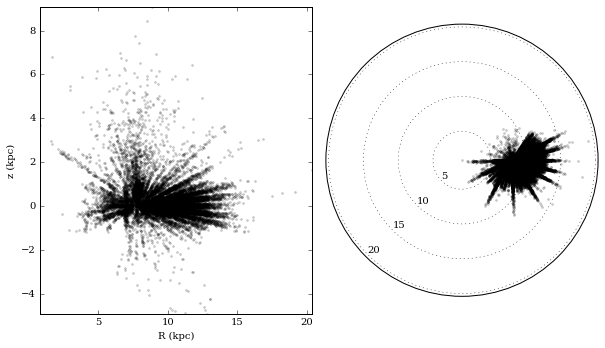

In [8]:
# Show the sample coverage in Galactocentric cylindrical coordinates
if doplot == True:
    redc.show_sample_coverage()

In [9]:
# To get fit results
# set gen=True to find residuals from scratch (~4 hr wait!)
# otherwise search in file
redc.findResiduals(gen=False)
redc.fitStatistic()
if doplot == True:
    redc.plotHistogram(rc.fitReducedChi,title = 'fit statistics',
                     xlabel='reduced $\chi^2$')

AttributeError: 'empca_residuals' object has no attribute 'fitSpectra'

AttributeError: 'empca_residuals' object has no attribute 'fitCoeffs'

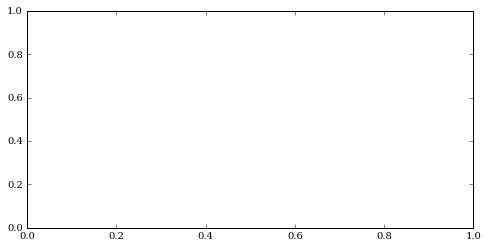

In [12]:
# Show an example of the fit
if doplot == True:
    redc.plot_example_fit(pixel=4313)

In [ ]:
# To get EMPCA results
# set gen=True to find eigenvectors from scratch
# otherwise search in file

stdcorr = 'pickles/n6819_30pix.pkl'

fnames = ['eig60_madFalse_corrFalse.pkl',
          'eig60_madTrue_corrFalse.pkl',
          'eig60_madFalse_corr30pix.pkl',
          'eig60_madTrue_corr30pix.pkl']

redc.pixelEMPCA(nvecs=60,mad=False,correction=None,
                gen=False,savename=fnames[0])
redc.pixelEMPCA(nvecs=60,mad=True,correction=None,
                gen=False,savename=fnames[1])
redc.pixelEMPCA(nvecs=60,mad=False,correction=stdcorr,
                gen=False,savename=fnames[2])
redc.pixelEMPCA(nvecs=60,mad=True,correction=stdcorr,
                gen=False,savename=fnames[3])


       iter        R2             rchi2
EMPCA  1/25       0.04630207      2.94540701
EMPCA  2/25       0.24749636      2.23306974
EMPCA  3/25       0.36626208      1.78869319
EMPCA  4/25       0.36965054      1.78045815
EMPCA  5/25       0.37185759      1.77549069
EMPCA  6/25       0.40137495      1.66414856
EMPCA  7/25       0.41189143      1.62566976
EMPCA  8/25       0.41519174      1.61415192
EMPCA  9/25       0.41677198      1.60876091
EMPCA 10/25       0.41772901      1.60550780
EMPCA 11/25       0.41837882      1.60332412
EMPCA 12/25       0.41885901      1.60174781
EMPCA 13/25       0.41925424      1.60047754
EMPCA 14/25       0.41961620      1.59931543
EMPCA 15/25       0.41994833      1.59823527
EMPCA 16/25       0.42022720      1.59731600
EMPCA 17/25       0.42044505      1.59659008
EMPCA 18/25       0.42061596      1.59601518
EMPCA 19/25       0.42075672      1.59553875
EMPCA 20/25       0.42087413      1.59514243
EMPCA 21/25       0.42096753      1.59483271
EMPCA 22/25    

In [ ]:
from comparison_plots import *
# See also from this package: plot_big_eig, plot_comb_eig and plot_eigenvector,
# each of which takes a list of eigenvectors. plot_eigenvector also requires a
# list of labels for the eigenvectors.
if doplot==True:
    comp_R2(fnames,direc=rc.name,
            labels = ['variance','M.A.D','variance & corrected',
                      'M.A.D & corrected'])
    

In [ ]:
# To test fit routines
rc.testFit(errs = rc.spectra_errs,randomize=True)

if doplot==True:
    rc.imshow(rc.diff.T/self.fitCoeffErrs.T,
              title='deviation from input fit coefficients over their uncertainty')